In [1]:
import sys
sys.path.append("..") ## resetting the path to the parent directory

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../data/coin_metadata.csv')

In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
def year_converter(year_string):
    
    year_string = str(year_string)
    
    split_string = year_string.split(' ')
    
    if len(split_string) > 1:
        if 'AD' in split_string:
            idx = split_string.index('AD')
            year = int(split_string[len(split_string) - 1 - idx])
        elif 'BC' in split_string:
            idx = split_string.index('BC')
            year = int('-' + split_string[len(split_string) - 1 - idx])
    else:
        if year_string == 'nan':
            year = None
        else:
            year = int(year_string)
    return year

In [ ]:
# ## From Min
# def fill_year_na(df):
#     avg_year = df.groupby('portrait').agg({'year': 'mean'}).reset_index()
#     na_mask = df['year'].isna()
#     df_masked = df[na_mask]
#     for i in df_masked.index:
#         portrait = df_masked.loc[i, 'portrait']
#         if portrait in avg_year['portrait'].values:
#             avg = avg_year.loc[avg_year['portrait'] == portrait, 'year'].values[0]
#             df_masked.loc[i, 'year'] = avg
#         else:
#             df_masked.loc[i, 'year'] = avg_year['year'].mean()
#     return df_masked

In [8]:
df['year'] = df['year'].apply(lambda x: year_converter(x))

In [10]:
df['year'] = df['year'].fillna(df.groupby('portrait')['year'].transform('mean').round())

## Finalized df to workwith
### At least 500 portraits to train the model

In [80]:
df_target = df[df.groupby('portrait')['portrait'].transform('size') > 500]

# Images and graphs

In [19]:
df_target['portrait'].value_counts().index

Index(['Constantine I', 'Constantius II', 'Trajan', 'Hadrian', 'Gallienus',
       'Antoninus Pius', 'Diocletian', 'Galerius', 'Licinius',
       'Marcus Aurelius', 'Maximian', 'Constantine II', 'Claudius Gothicus',
       'Augustus', 'Tetricus I', 'Caracalla', 'Commodus', 'Constans',
       'Victorinus', 'Domitian', 'Septimius Severus', 'Constantius Chlorus',
       'Tetricus II', 'Severus Alexander', 'Maximinus Daia', 'Vespasian',
       'Gordian III', 'Probus', 'Crispus'],
      dtype='object')

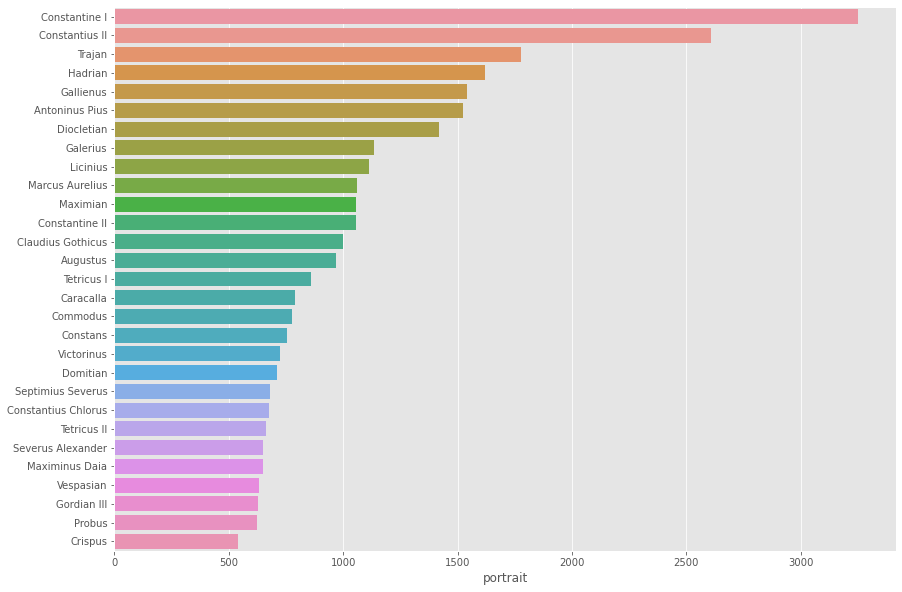

In [23]:
fig,ax = plt.subplots(figsize=(14,10))
sns.barplot(y = df_target['portrait'].value_counts().index, 
            x = df_target['portrait'].value_counts(),
           ax = ax);

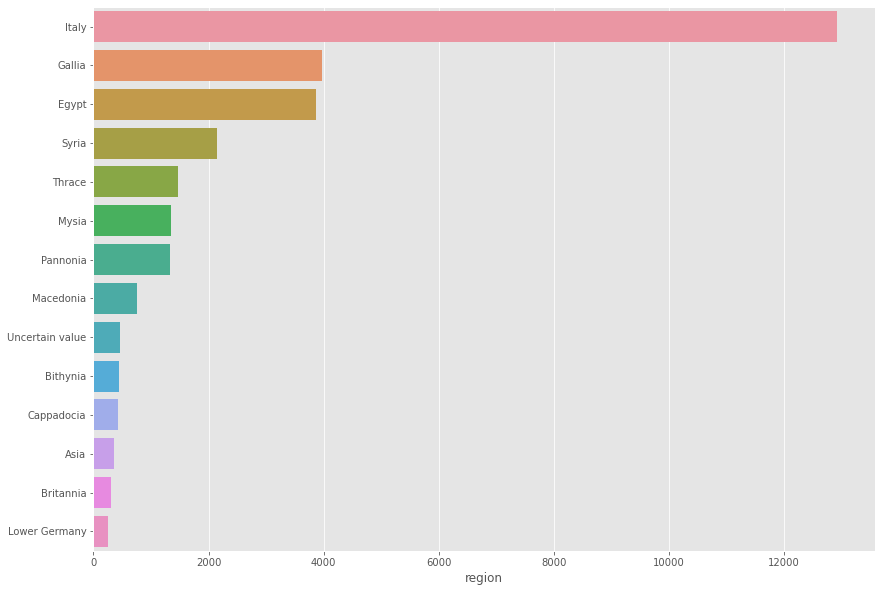

In [34]:
df_temp = df_target[df_target.groupby('region')['region'].transform('size')>250]

fig,ax = plt.subplots(figsize=(14,10))
sns.barplot(y = df_temp['region'].value_counts().index,
            x = df_temp['region'].value_counts(),
            ax = ax);

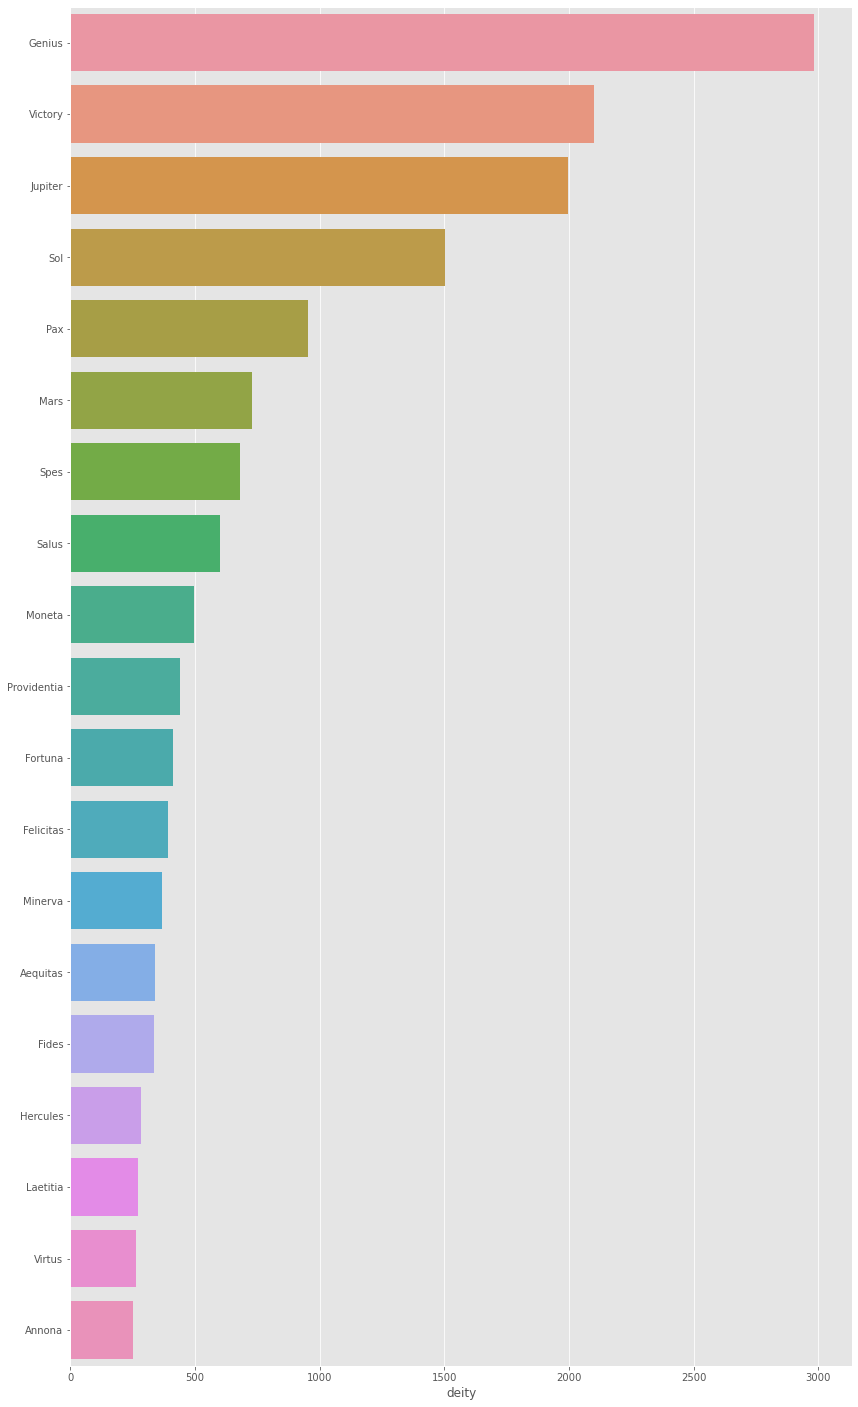

In [32]:
df_temp = df_target[df_target.groupby('deity')['deity'].transform('size')>250]


fig,ax = plt.subplots(figsize=(14,25))
sns.barplot(y = df_temp['deity'].value_counts().index,
            x = df_temp['deity'].value_counts(),
            ax = ax);

In [35]:
df_target.columns

Index(['authority', 'portrait', 'year', 'obj', 'denomination', 'material',
       'region', 'deity', 'url', 'fname'],
      dtype='object')

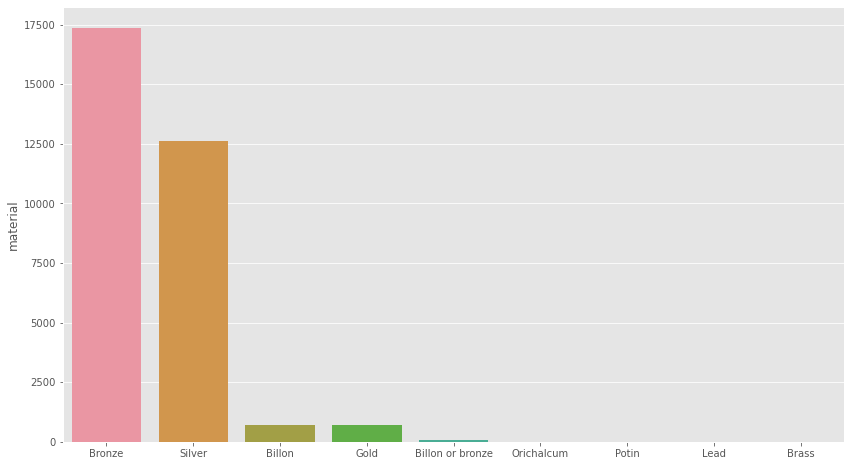

In [39]:
#df_temp = df_target[df_target.groupby('deity')['deity'].transform('size')>250]


fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(x = df_target['material'].value_counts().index,
            y = df_target['material'].value_counts(),
            ax = ax);

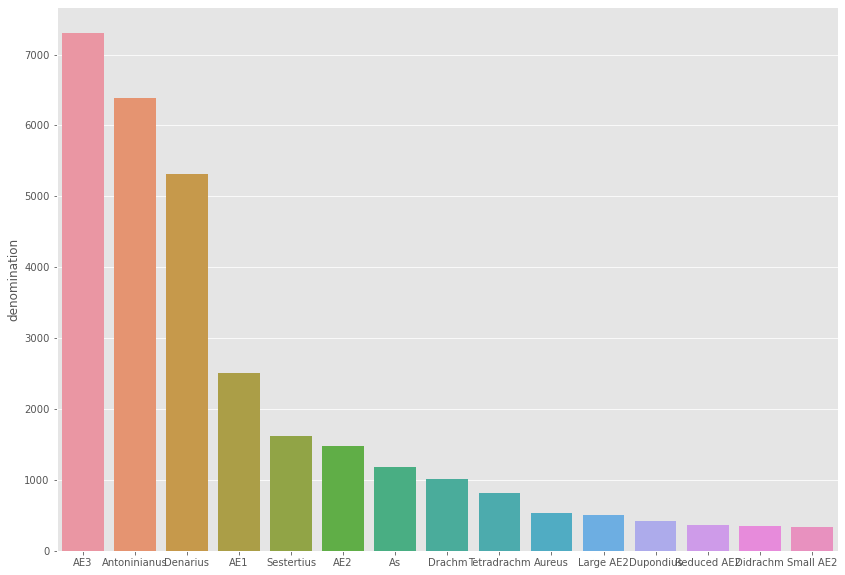

In [49]:
df_temp = df_target[df_target.groupby('denomination')['denomination'].transform('size')>250]


fig,ax = plt.subplots(figsize=(14,10))
sns.barplot(x = df_temp['denomination'].value_counts().index,
            y = df_temp['denomination'].value_counts(),
            ax = ax);

In [81]:
bins = [-60, 0, 50, 100, 150, 200, 250, 300, 350, 400]
bin_labels = ['BC','1-50','51-100','101-150','151-200','201-250','251-300','301-350', '351+']
df['years_bins'] = pd.cut(df_target['year'],bins = bins, labels=bin_labels,include_lowest=True)

#df_target.insert(-1,'year_bins',years)

In [116]:
df_temp = df_target[df_target.groupby('denomination')['denomination'].transform('size')>250]
denominations_df = pd.DataFrame(df_temp.groupby('years')['denomination'].value_counts())

In [117]:
denominations_df.columns = ['counts']

In [118]:
denominations_df.reset_index(inplace=True)

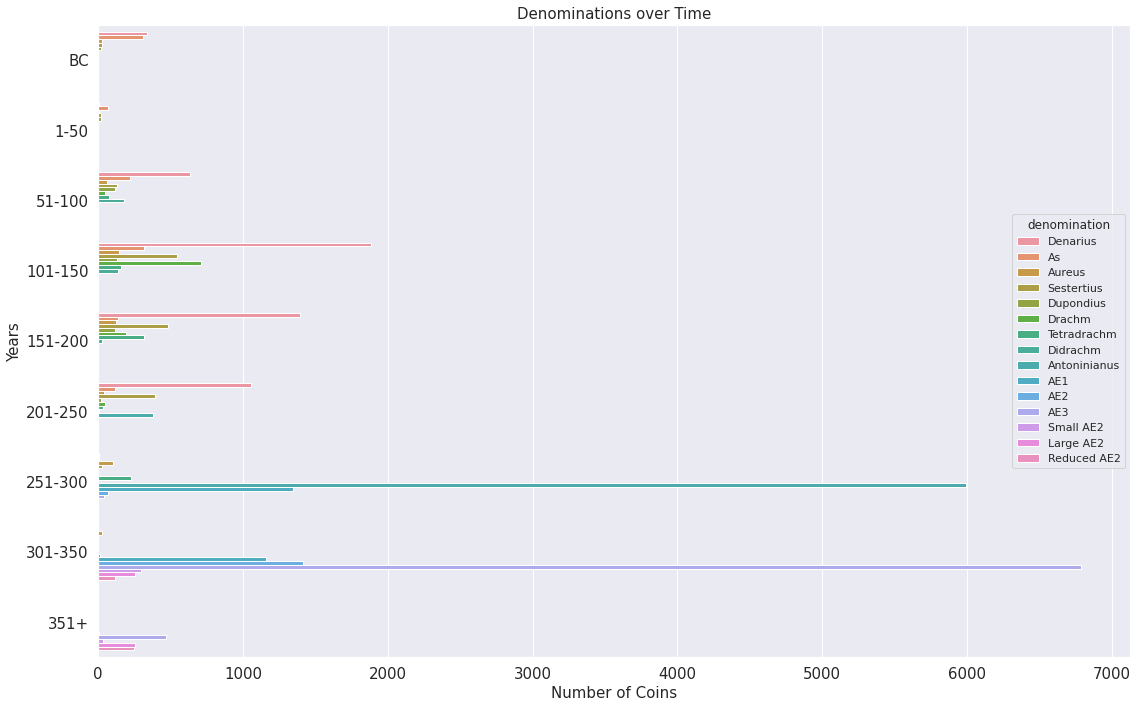

In [146]:
fig,ax = plt.subplots(figsize=(16,10))
sns.set(font_scale = 1)
a = sns.barplot(y=denominations_df['years'],
            x=denominations_df['counts'],
            hue=denominations_df['denomination'],
            ax=ax);

#a.set_yticklabels(a.get_yticks(), size = 15)

_, ylabels = plt.yticks()
a.set_yticklabels(ylabels, size=15)

_, xlabels = plt.xticks()
a.set_xticklabels(xlabels, size=15)

ax.set_ylabel('Years',fontsize=15)
ax.set_xlabel('Number of Coins',fontsize=15)

ax.set_xticklabels([0,1000,2000,3000,4000,5000,6000,7000],fontsize=15)
ax.set_title('Denominations over Time',fontsize=15)
plt.tight_layout()

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]), <a list of 9 Text major ticklabel objects>)


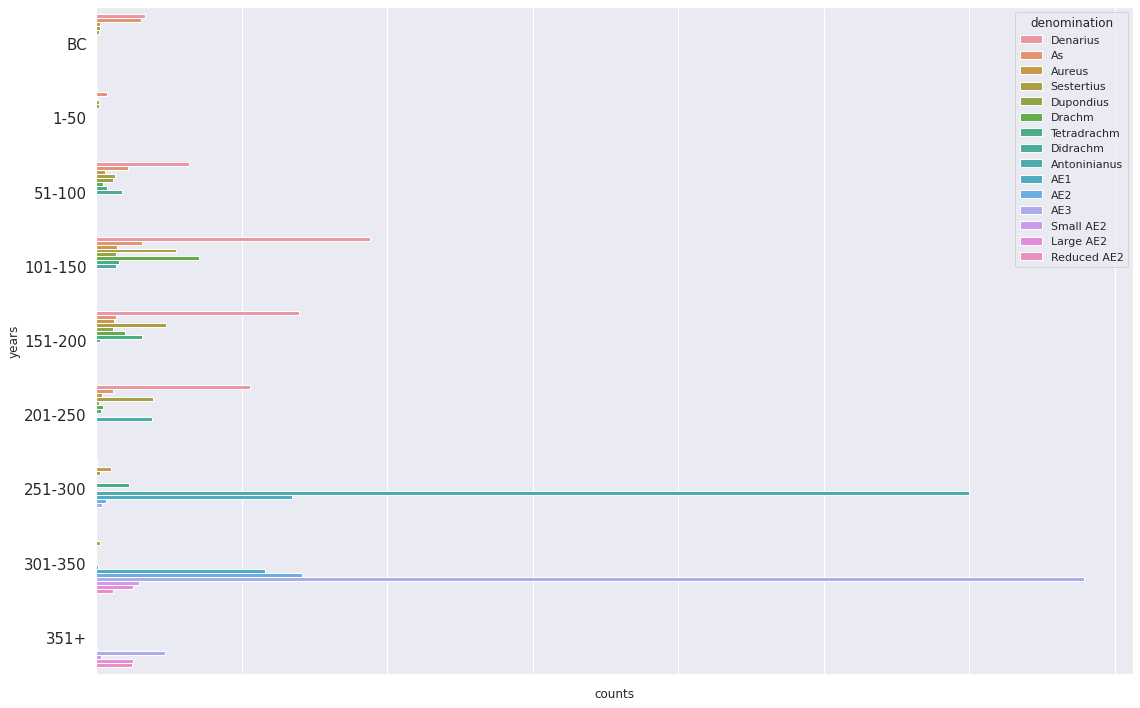

In [139]:
fig,ax = plt.subplots(figsize=(16,10))
sns.set(font_scale = 1)
a = sns.barplot(y=denominations_df['years'],
            x=denominations_df['counts'],
            hue=denominations_df['denomination'],
            ax=ax);

#a.set_yticklabels(a.get_yticks(), size = 15)

_, ylabels = plt.yticks()
a.set_yticklabels(ylabels, size=15)

_, xlabels = plt.xticks()
a.set_xticklabels(xlabels, size=15)

#ax.set_ylabel('Years',fontsize=15)
#ax.set_xlabel('Counts',fontsize=15)

#ax.set_xticklabels([0,1000,2000,3000,4000,5000,6000,7000],fontsize=15)
plt.tight_layout()
print(plt.xticks())